# Home assignement: Stochastic models

This tutorial illustrates the manipulation of stochastic models (sampling, estimation, ...).

## Part 1: Processing and spectral analysis of Local Field Potentials
Local Field Potentials (LFPs) designate the "low" frequency part of the electrical potential in the extracellular medium of the brain, typically below 200Hz. It reflects many network processes, and is assumed to be generated, to a large extended, by post-synaptic currents entering the neurons.

Let us load some exemplary data recoded from the macaque hippocampus that you can dowload from https://owncloud.tuebingen.mpg.de/index.php/s/REc82bzpCetG27T (update the dataPath variable below before loading).

In [10]:
# load local field potential
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch,butter,lfilter, filtfilt

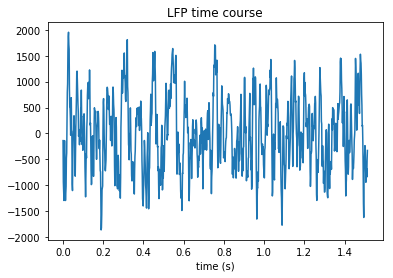

In [26]:
lfpdat = io.loadmat("./LFPdat.mat")

# Define LFP time series
LFP = lfpdat['LFP'][:,0]
# Define sampling period dt (sampling frequency is 660Hz)
dt = lfpdat['dt'][:,0]
fs = 660;
t = np.arange(LFP.shape[0])*dt

# we plot only the begining of the recording
plt.plot(t[0:1000],LFP[0:1000])
plt.title('LFP time course')
plt.xlabel('time (s)')
plt.show()

We want to estimate the Power Spectral Density of the LFP signal. We use the scipy.signal.welch function for this purpose. **Please refer to the spectral analysis tutorial on Ilias (tutorial 2) for the use of this function.**

**Important: plot all periodograms with a physical frequency axis (Hz)**

**Question 1:**
 - (a) The "nperseg" controls the width (number of points of the segments used by the algorithm to compute a single DFT (with the FFT algorithm). We want to get a frequency resolution of approximately 1Hz, how should we choose (as an order of magnitude) the "nperseg" parameter?
    Plot the welch periodogram of the LFP signal. What are the dominate which frequencies (in Hz) in this signal.


The inverse of the frequency resolution provides a minimum value for the window length to be used. 

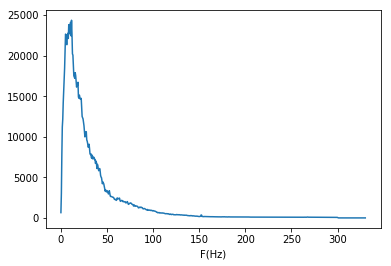

In [94]:
nperseg_val = 660*2;
[freq,pwy] = welch(LFP,axis=0,nperseg=nperseg_val, fs=660);
plt.plot(freq,pwy);
plt.xlabel('F(Hz)')
plt.show();

 - (b) The time resoved power in the so called gamma band of the LFP has been reported to reflect the amount of recurrent activity in the network, and is relates to the BOLD signal measured in fMRI. Perform the following operations to extract this time resolved amplitude: 
   - filter the LFP in the [60,120Hz] band to obtain signal $g$ (use scipy.signal.filtfilt to apply a zero phase filter), 
   - take the square of $g$, $g^2$, 
   - low pass filter $g^2$ below $60Hz$ to get $g_{pow}$ the time resolved gamma power. 
   For each signal (LFP,$g$ ,$g^2$,$g_{pow}$), estimate the PSD with the Welch periodogram and plot it. 

In [112]:
lowcut = 60;
highcut = 120;
nyq = 0.5 * fs;
low = lowcut / nyq;
high = highcut / nyq;
order = 3;

b, a = butter(order, [low, high], btype='band');

g = filtfilt(b, a, LFP);
g_sqr = g**2;

b, a = butter(order, low, btype='low');
g_pow = filtfilt(b, a, g_sqr);

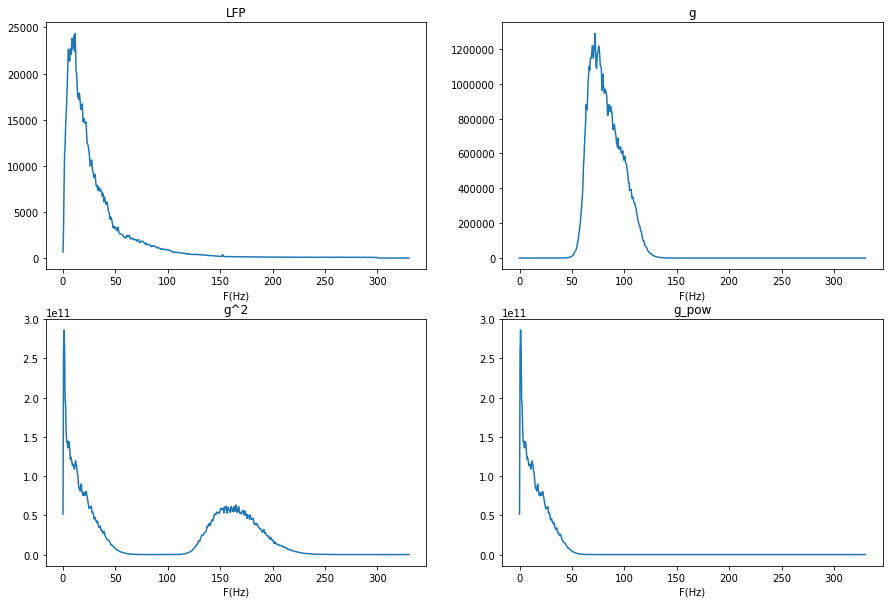

In [121]:
[freq_g, pwy_g] = welch(g,axis=0,nperseg=nperseg_val);
[freq_g_sqr, pwy_g_sqr] = welch(g_sqr,axis=0,nperseg=nperseg_val);
[freq_g_pow, pwy_g_pow] = welch(g_pow,axis=0,nperseg=nperseg_val);

plt.figure(figsize=(15, 10));

plt.subplot(2,2,1);
plt.plot(freq, pwy);
plt.title('LFP');
plt.xlabel('F(Hz)');

freq_g = freq_g*660;
plt.subplot(2,2,2);
plt.plot(freq_g, pwy_g);
plt.title('g');
plt.xlabel('F(Hz)');

freq_g_sqr = freq_g_sqr*660;
plt.subplot(2,2,3);
plt.plot(freq_g_sqr, pwy_g_sqr);
plt.title('g^2');
plt.xlabel('F(Hz)');

freq_g_pow = freq_g_pow*660;
plt.subplot(2,2,4);
plt.plot(freq_g_pow, pwy_g_pow);
plt.title('g_pow');
plt.xlabel('F(Hz)');

plt.show();

 - (c) Given that the periodogram reflects (to some extent, see lecture) the expected squared modulus of the Fourier transform of signal realisations, justify qualitatively the shape taken the successive PSDs (why particular frequencies appear or are preserved/removed)

 - (d) Based on the above periodogram of $g_{pow}$, justify that downsampling it by taking every 5th point is reasonable (hint: reason as if the downsampled signal corresponds to directly sampling the corresponding continuous signal, compute the new sampling frequency and the Nyquist frequency to justify). 

In [148]:
g_pow_dsample = g_pow[0::5]

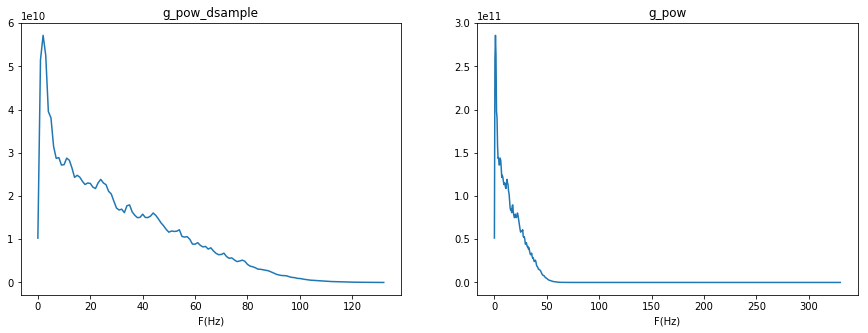

In [154]:
[freq_g_pow_dsample, pwy_g_pow_dsample] = welch(g_pow_dsample,axis=0,nperseg=nperseg_val/5);

plt.figure(figsize=(15, 5));

freq_g_pow_dsample = freq_g_pow_dsample*(nperseg_val/5);
plt.subplot(1,2,1);
plt.plot(freq_g_pow_dsample, pwy_g_pow_dsample);
plt.title('g_pow_dsample');
plt.xlabel('F(Hz)');

plt.subplot(1,2,2);
plt.plot(freq_g_pow, pwy_g_pow);
plt.title('g_pow');
plt.xlabel('F(Hz)');

plt.show();

 - (e) Plot the square root of $g_{pow}$ and check if follows the enveloppe of $g$ correctly.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


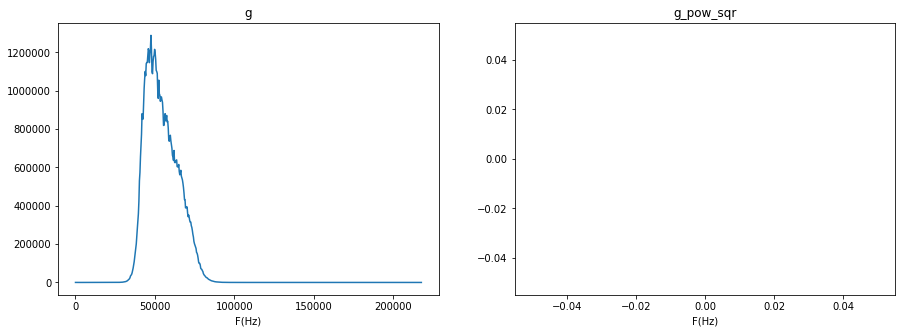

In [155]:
g_pow_sqr_root = g_pow**0.5;
[freq_g_pow_sqr_root, pwy_g_pow_sqr_root] = welch(g_pow_sqr_root,axis=0,nperseg=nperseg_val);

plt.figure(figsize=(15, 5));

plt.subplot(1,2,1);
plt.plot(freq_g*660, pwy_g);
plt.title('g');
plt.xlabel('F(Hz)');

plt.subplot(1,2,2);
plt.plot(freq_g_pow_sqr_root*660, pwy_g_pow_sqr_root);
plt.title('g_pow_sqr');
plt.xlabel('F(Hz)');

plt.show();

 - (e) Downsample $g_{pow}$ as explained, to obtain $g_d$ and compute an estimate of its PSD, with the same frequency resolution (which window size should be taken now in the welch function? By comparing the PSD with the orginal one, is the downsampling well behaved? Justify qualitatively why the chosen frequency was appropriate.     